In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
def out_remove(col_name,df,cond,m):
    quartile1 = df[col_name].quantile(0.25)
    quartile3 = df[col_name].quantile(0.75)
    iqr = quartile3 - quartile1
    upper = quartile3 + m * iqr
    lower = quartile1 - m * iqr
    if(cond=='both'):
        new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    elif(cond=='lower'):
        new_df = df[(df[col_name] > lower)]
    else:
        new_df = df[(df[col_name] < upper)]
    return new_df

In [4]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


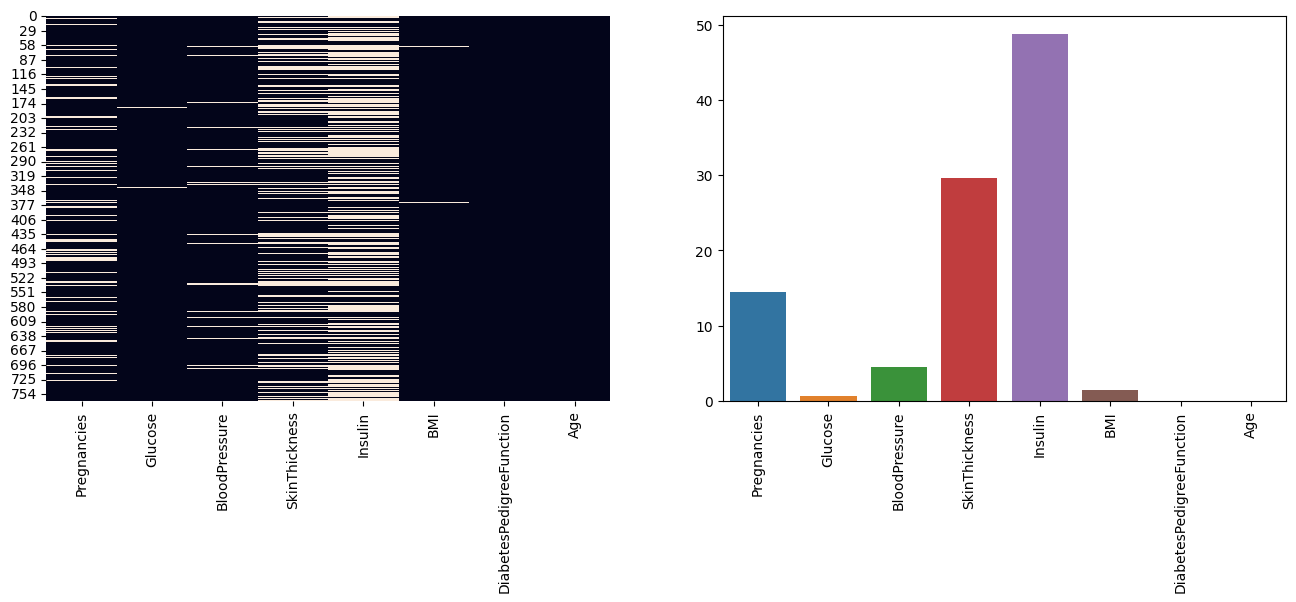

In [5]:
#Replace zeros with nan
d_copy = diabetes_df.copy()
d_copy=d_copy.drop(columns=['Outcome'],axis=1)
d_copy = d_copy.replace(0,np.nan)
#sns.heatmap(d_copy.isnull(),cmap = 'magma',cbar = False);

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.heatmap(d_copy.isnull(), cbar=False, ax=ax1)
percent_missing = d_copy.isnull().mean() * 100
sns.barplot(x=percent_missing.index, y=percent_missing ,ax=ax2)
plt.xticks(rotation=90)
plt.show()

In [6]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train=pd.concat([X_train, y_train], axis=1)
X_test=pd.concat([X_test, y_test], axis=1)
X_train.to_csv('train_data.csv', index=False)
X_test.to_csv('test_data.csv', index=False)
print(X_train.shape)
print(y_train.shape)

(576, 9)
(576,)


In [9]:
#Treating Outlier and then verifying it
X_train = out_remove('Pregnancies',X_train,'both',1.5)
#---------------------
X_test = out_remove('Pregnancies',X_test,'both',1.5)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
751,1,121,78,39,74,39.0,0.261,28,0
358,12,88,74,40,54,35.3,0.378,48,0
718,1,108,60,46,178,35.5,0.415,24,0
536,0,105,90,0,0,29.6,0.197,46,0
651,1,117,60,23,106,33.8,0.466,27,0
...,...,...,...,...,...,...,...,...,...
676,9,156,86,0,0,24.8,0.230,53,1
113,4,76,62,0,0,34.0,0.391,25,0
556,1,97,70,40,0,38.1,0.218,30,0
152,9,156,86,28,155,34.3,1.189,42,1


In [10]:
X_train['Glucose'] = X_train['Glucose'].replace(0,X_train['Glucose'].mean())
#------------------
X_test['Glucose'] = X_test['Glucose'].replace(0,X_test['Glucose'].mean())

In [11]:
X_train = out_remove('Glucose',X_train,'both',1.5)
#-----------------
X_test = out_remove('Glucose',X_test,'both',1.5)

In [17]:
X_train['BloodPressure'] = X_train['BloodPressure'].replace(0,X_train['BloodPressure'].median())
#------------
X_test['BloodPressure'] = X_test['BloodPressure'].replace(0,X_test['BloodPressure'].median())
X_train = out_remove('BloodPressure',X_train,'lower',1.5)
#------------
X_test = out_remove('BloodPressure',X_test,'lower',1.5)
X_train['SkinThickness'] = X_train['SkinThickness'].replace(0,X_train['SkinThickness'].mean())
#-----------
X_test['SkinThickness'] = X_test['SkinThickness'].replace(0,X_test['SkinThickness'].mean())
X_train = out_remove('SkinThickness',X_train,'both',1.5)
#------------
X_test = out_remove('SkinThickness',X_test,'both',1.5)
X_train['Insulin'] = X_train['Insulin'].replace(0,X_train['Insulin'].median())
#-----------
X_test['Insulin'] = X_test['Insulin'].replace(0,X_test['Insulin'].median())
X_train['BMI'] = X_train['BMI'].replace(0,X_train['BMI'].mean())
#----------
X_test['BMI'] = X_test['BMI'].replace(0,X_test['BMI'].mean())
X_train = out_remove('DiabetesPedigreeFunction',X_train,'both',1.5)
#------------
X_test = out_remove('DiabetesPedigreeFunction',X_test,'both',1.5)

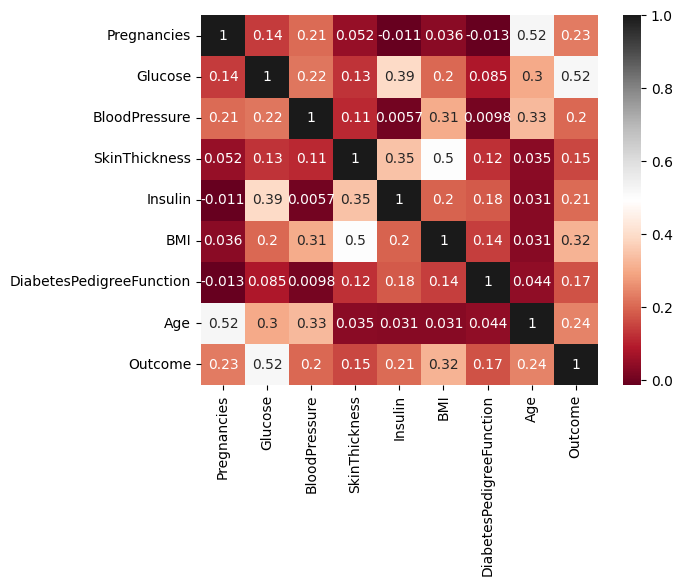

In [18]:
sns.heatmap(X_train.corr(),cmap = 'RdGy',annot = True,cbar=True);

<AxesSubplot: xlabel='Importance', ylabel='Feature'>

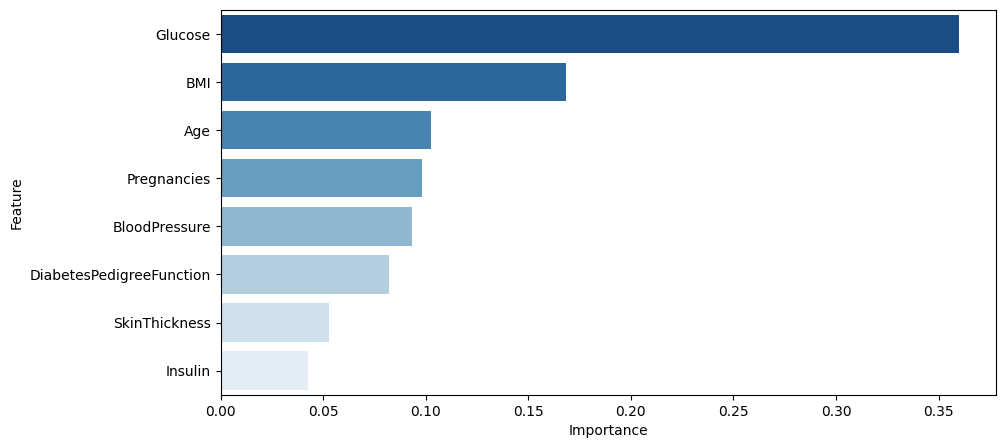

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model
plt.figure(figsize=(10, 5))

model = DecisionTreeClassifier()
z_copy = X_train.copy()
y = z_copy.iloc[:,-1]
X = z_copy.iloc[:,:-1]
model.fit(X, y)
importances = model.feature_importances_
#print(model.feature_importances_)
indices = np.argsort(importances)[::-1]
df = pd.DataFrame({'Feature': X.columns[indices], 'Importance': importances[indices]})
sns.barplot(x='Importance', y='Feature', palette="Blues_r",data=df )

In [20]:
X_train.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)
X_test.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)

In [21]:
y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,:-1]
y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,:-1]
X_train

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
751,1,121.0,78,39.0,0.261,28
358,12,88.0,74,35.3,0.378,48
718,1,108.0,60,35.5,0.415,24
536,0,105.0,90,29.6,0.197,46
651,1,117.0,60,33.8,0.466,27
...,...,...,...,...,...,...
676,9,156.0,86,24.8,0.230,53
113,4,76.0,62,34.0,0.391,25
556,1,97.0,70,38.1,0.218,30
152,9,156.0,86,34.3,1.189,42


In [22]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
scaled_X_train = normalizer.fit_transform(X_train)
scaled_X_test = normalizer.transform(X_test)
print(scaled_X_train)
scaled_X_test

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

[[0.07692308 0.45774648 0.43589744 0.42535787 0.15526316 0.11666667]
 [0.92307692 0.22535211 0.38461538 0.34969325 0.25789474 0.45      ]
 [0.07692308 0.36619718 0.20512821 0.35378323 0.29035088 0.05      ]
 ...
 [0.07692308 0.28873239 0.33333333 0.40695297 0.11754386 0.15      ]
 [0.69230769 0.70422535 0.53846154 0.32924335 0.96929825 0.35      ]
 [0.30769231 0.61971831 0.17948718 0.23108384 0.17807018 0.26666667]]


In [25]:
def evaluate_model(y_val, y_pred):
    """Function to evaluate model and return the metric of the model
  
    It returns a dictionary with the classification metrics.
    """
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
  
    result = {"accuracy_score": accuracy,
              "precision_score": precision,
              "recall_score": recall,
              "f1_score": f1}
    return result
def plot_confusion_matrix(y_val, y_pred, label):
    '''function to plot confusion matrix

    Args
    y_val: array. The validation set of the target variable.
    y_pred: array. Model's prediction.
    label: list. A list containing all the classes in the target variable

    Returns
    It returns a plot of the confusion matrix
    '''
    cm = confusion_matrix(y_val, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['1','2']

{'accuracy_score': 0.7401129943502824, 'precision_score': 0.7287015690227108, 'recall_score': 0.7401129943502824, 'f1_score': 0.7306588371368833}
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       121
           1       0.61      0.48      0.54        56

    accuracy                           0.74       177
   macro avg       0.70      0.67      0.68       177
weighted avg       0.73      0.74      0.73       177



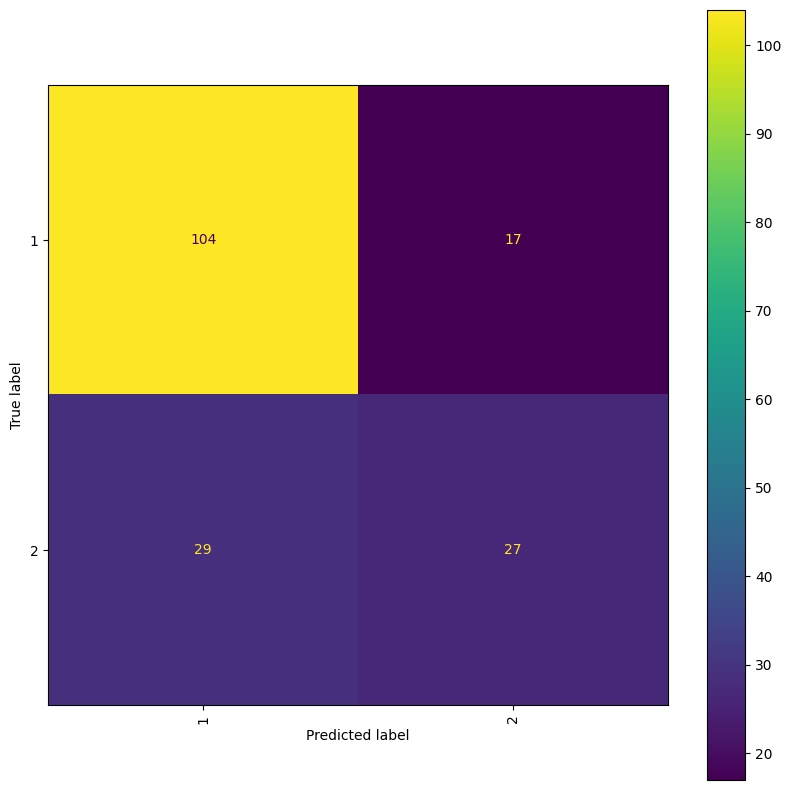

In [26]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(scaled_X_train, y_train)

# Evaluate model on the test set
lr_y_pred = lr_model.predict(scaled_X_test)

lr_test_result = evaluate_model(y_test, lr_y_pred)
print(lr_test_result)
print(classification_report(y_test, lr_y_pred))
plot_confusion_matrix(y_test, lr_y_pred, label)

{'accuracy_score': 0.7401129943502824, 'precision_score': 0.7334934828061747, 'recall_score': 0.7401129943502824, 'f1_score': 0.7359014961607366}
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       121
           1       0.60      0.54      0.57        56

    accuracy                           0.74       177
   macro avg       0.70      0.69      0.69       177
weighted avg       0.73      0.74      0.74       177



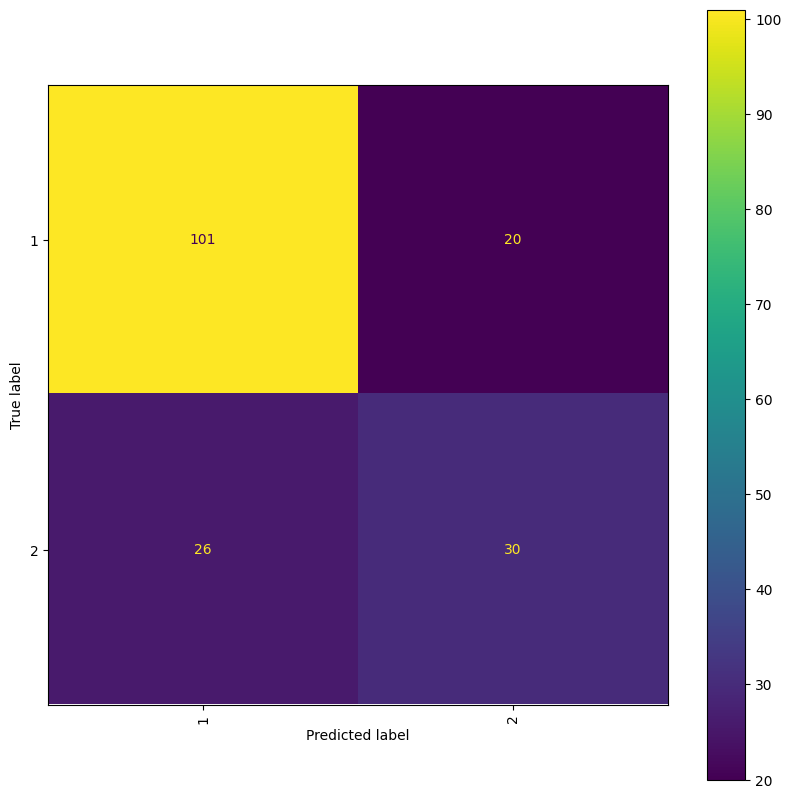

In [28]:
from sklearn.ensemble import RandomForestClassifier
SEED = 20
rf_model = RandomForestClassifier(random_state=SEED)
rf_model.fit(scaled_X_train, y_train)

# Evaluate model on the test set
rf_y_pred = rf_model.predict(scaled_X_test)

rf_test_result = evaluate_model(y_test, rf_y_pred)
print(rf_test_result)
print(classification_report(y_test, rf_y_pred))
plot_confusion_matrix(y_test, rf_y_pred, label)

{'accuracy_score': 0.7401129943502824, 'precision_score': 0.7334934828061747, 'recall_score': 0.7401129943502824, 'f1_score': 0.7359014961607366}
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       121
           1       0.68      0.50      0.58        56

    accuracy                           0.77       177
   macro avg       0.74      0.70      0.71       177
weighted avg       0.76      0.77      0.76       177



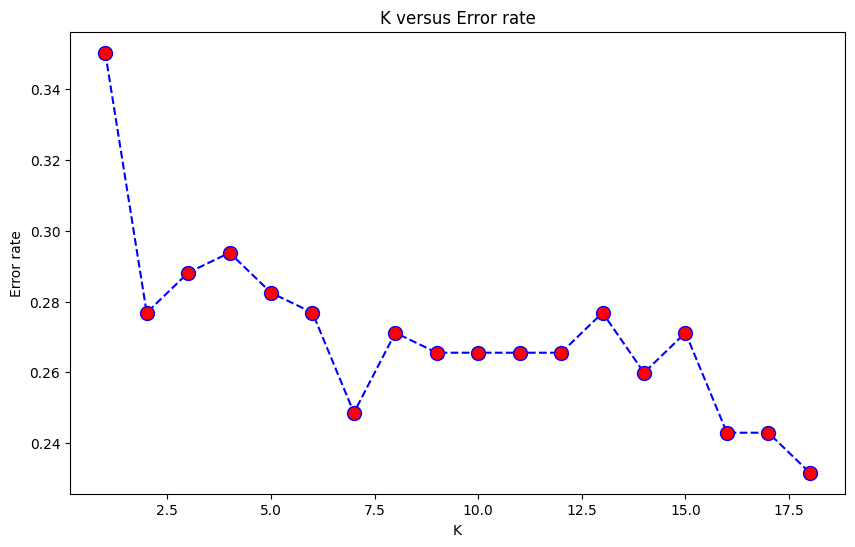

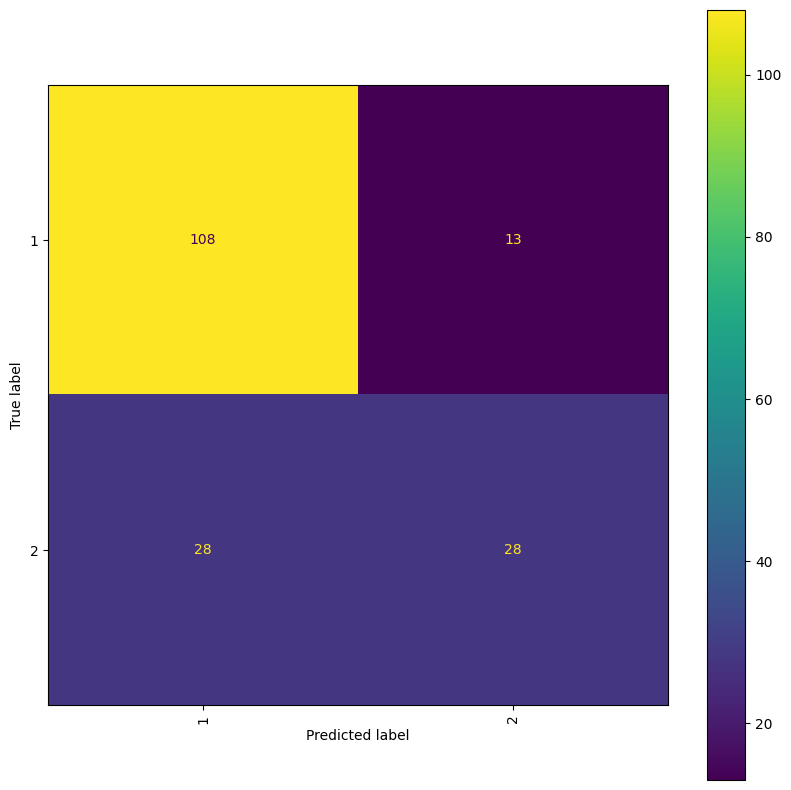

In [31]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 19):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 19), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')
knn_y_pred = knn.predict(scaled_X_test)

knn_test_result = evaluate_model(y_test, knn_y_pred)
print(rf_test_result)
print(classification_report(y_test, knn_y_pred))
plot_confusion_matrix(y_test, knn_y_pred, label)

{'accuracy_score': 0.7005649717514124, 'precision_score': 0.6991445435179806, 'recall_score': 0.7005649717514124, 'f1_score': 0.699832286775162}
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       121
           1       0.53      0.52      0.52        56

    accuracy                           0.70       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.70      0.70      0.70       177



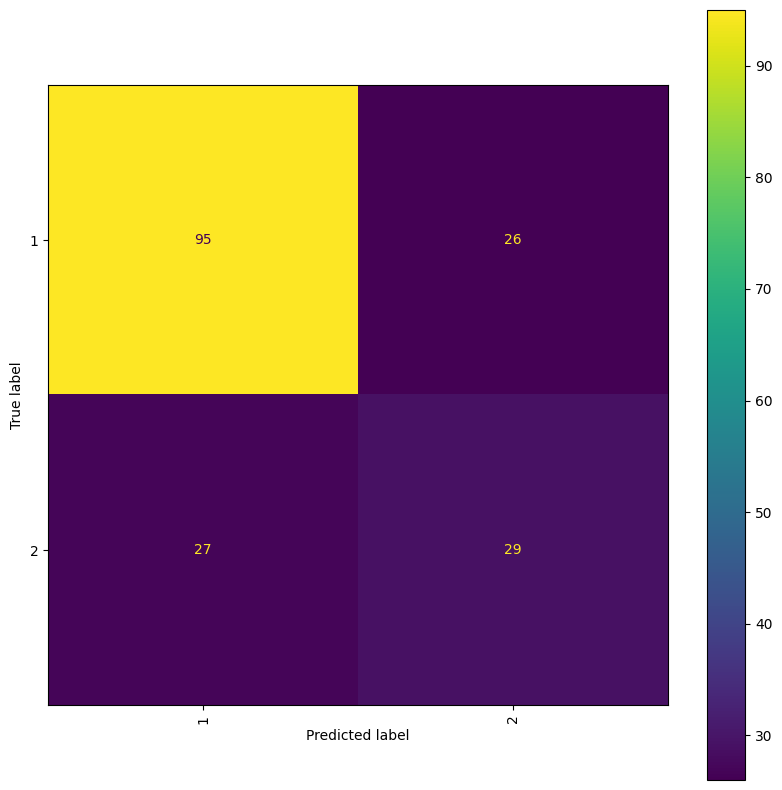

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X_train, y_train)
clf_y_pred = clf.predict(scaled_X_test)

clf_test_result = evaluate_model(y_test, clf_y_pred)
print(clf_test_result)
print(classification_report(y_test, clf_y_pred))
plot_confusion_matrix(y_test, clf_y_pred, label)

{'accuracy_score': 0.7344632768361582, 'precision_score': 0.7232580037664783, 'recall_score': 0.7344632768361582, 'f1_score': 0.7257758937279137}
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       121
           1       0.60      0.48      0.53        56

    accuracy                           0.73       177
   macro avg       0.69      0.67      0.67       177
weighted avg       0.72      0.73      0.73       177



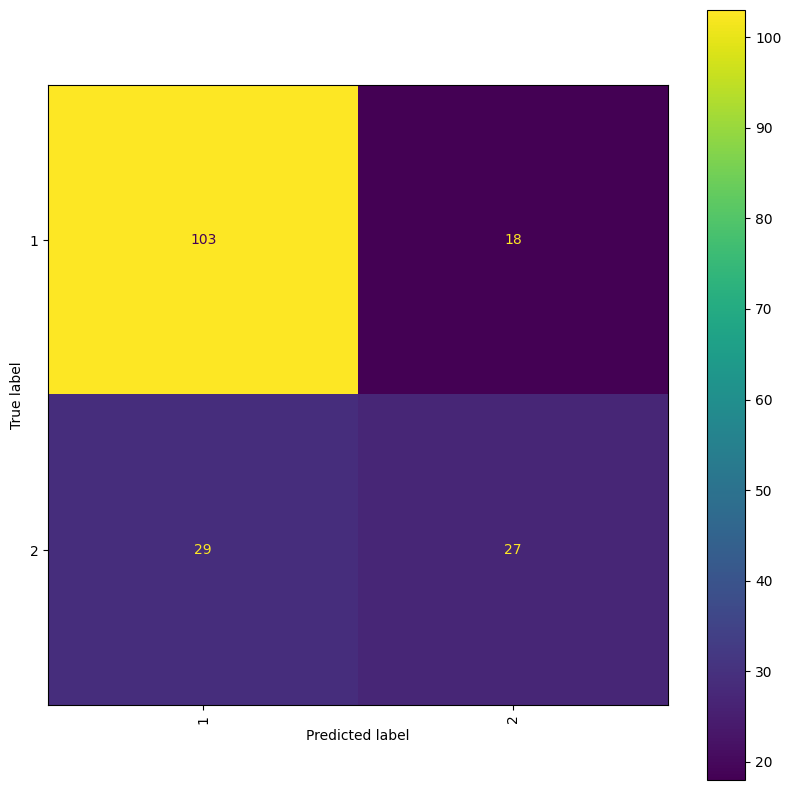

In [33]:
from sklearn import svm
svmtrain= svm.SVC(kernel='linear') 
# linear is the default kernel, you can use also rbf, poly and sigmoid

# training the classifier on the data
svmtrain.fit(scaled_X_train, y_train)
svm_y_pred = svmtrain.predict(scaled_X_test)
svm_test_result = evaluate_model(y_test, svm_y_pred)

print(svm_test_result)
print(classification_report(y_test, svm_y_pred))
plot_confusion_matrix(y_test, svm_y_pred, label)

[1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0]
{'accuracy_score': 0.7231638418079096, 'precision_score': 0.721856239527815, 'recall_score': 0.7231638418079096, 'f1_score': 0.7224864538109986}
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       121
           1       0.56      0.55      0.56        56

    accuracy                           0.72       177
   macro avg       0.68      0.68      0.68       177
weighted avg       0.72      0.72      0.72       177



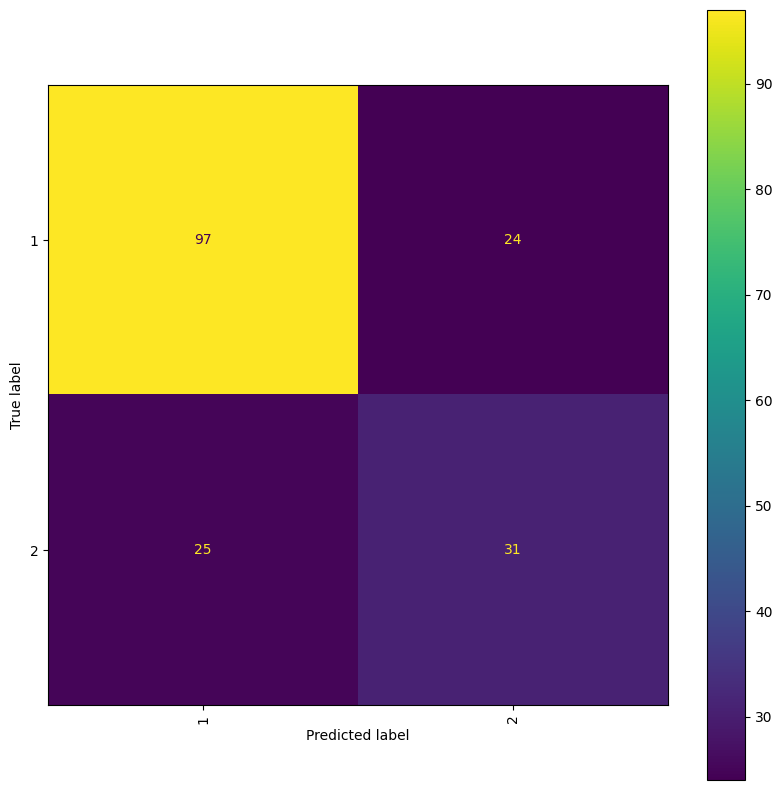

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# training the classifier on the data
gnb.fit(scaled_X_train, y_train)
gnb_y_pred = gnb.predict(scaled_X_test)
gnb_test_result = evaluate_model(y_test, gnb_y_pred)
print(gnb_y_pred)
print(gnb_test_result)
print(classification_report(y_test, gnb_y_pred))
plot_confusion_matrix(y_test, gnb_y_pred, label)

In [7]:
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# mlp.fit(scaled_X_train, y_train)
# #ann_test_result = evaluate_model(y_test, ann_y_pred)
# mlp_y_pred = mlp.predict(scaled_X_test).round()

# mlp_test_result = evaluate_model(y_test, mlp_y_pred)
# print(mlp_y_pred)
# print(mlp_test_result)
# print(classification_report(y_test, mlp_y_pred))
# plot_confusion_matrix(y_test, mlp_y_pred, label)


# from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# # Load the data
# X, y 

# # Define the MLP classifier
# mlp = MLPClassifier()

# # Perform 3-fold cross-validation
# scores = cross_val_score(mlp, X, y, cv=3)

# # Print the mean and standard deviation of the scores
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
X, y 

# Define the parameters to search
parameters = {'hidden_layer_sizes': [(5,), (20,), (30,),(40,),(50,),(60,),(70,),(80,),(90,)],
              'activation': ['relu', 'tanh', 'logistic'],
              'alpha': [0.0001, 0.001, 0.01]}

# Define the MLP classifier
mlp = MLPClassifier()

# Perform 3-fold cross-validation with grid search
clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X, y)

# Print the best parameters
print(clf.best_params_)
scores = cross_val_score(mlp, X, y, cv=5)

# # Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (90,)}
Accuracy: 0.68 (+/- 0.09)


burda
Epoch 1/24
18/18 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5183
Epoch 2/24
18/18 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6575
Epoch 3/24
18/18 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6538
Epoch 4/24
18/18 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.6575
Epoch 5/24
18/18 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.6960
Epoch 6/24
18/18 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.6795
Epoch 7/24
18/18 [==============================] - 0s 997us/step - loss: 0.5805 - accuracy: 0.7198
Epoch 8/24
18/18 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.7546
Epoch 9/24
18/18 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7619
Epoch 10/24
18/18 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7344
Epoch 11/24

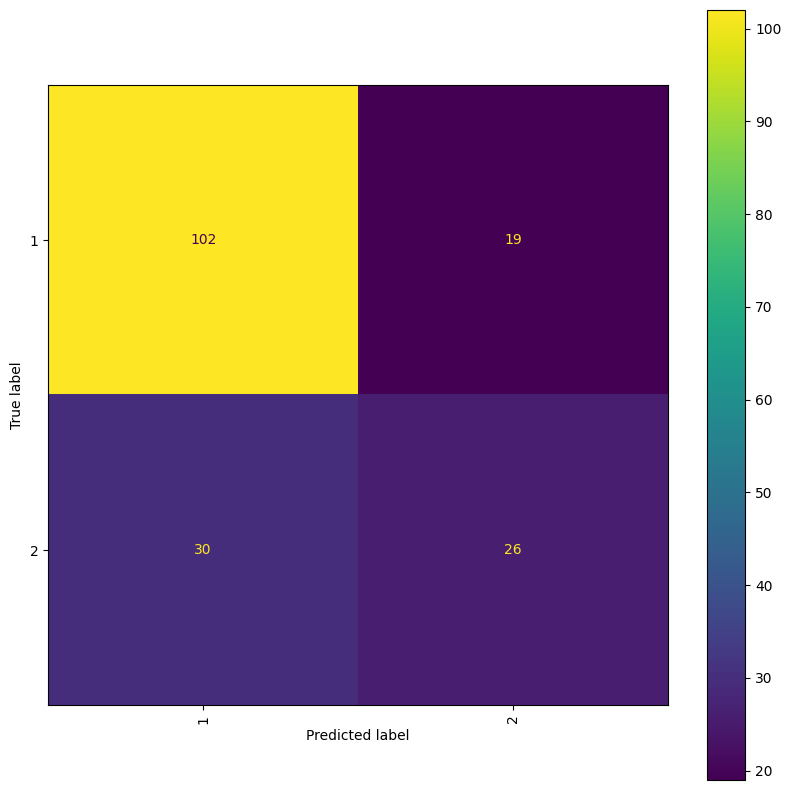

In [39]:
from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("burda")
# train the model
model.fit(scaled_X_train, y_train, epochs=24, batch_size=32)
print("burda")
ann_y_pred =model.predict(scaled_X_test).round()
print(ann_y_pred)
from sklearn.metrics import accuracy_score

# predict the labels of the test set

# calculate the accuracy
accuracy = accuracy_score(y_test, ann_y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix
ann_test_result = evaluate_model(y_test, ann_y_pred)
print(ann_y_pred)
print(ann_test_result)
print(classification_report(y_test, ann_y_pred))
plot_confusion_matrix(y_test, ann_y_pred, label)
